Op het examen maak je nergens gebruik van Python for-loops, whiles of list comprehensions tenzij anders vermeld. De code die je schrijft moet zo efficient mogelijk worden uitgevoerd door numpy of pandas.\

In [1]:
import pandas as pd
import numpy as np
from seaborn import lineplot


# Vraag 1

In [4]:
np_rng = np.random.default_rng(seed=15)
df_vraag1 = pd.DataFrame(np.round(np_rng.random((100,10)),3),dtype='float32', index=range(5,105), columns=range(10,20))
nparray_vraag1 = df_vraag1.to_numpy()



Hierboven genereren we een dataframe met naam ``df_vraag1`` en de ndarray op basis vandezelfde data is ook beschikbaar als numpy-array met de naam ``nparray_vraag1``. Druk deze dataset af doe "view as Dataframe" in PyCharm. Beantwoord de volgende vragen zonder het echt uit te voeren. Op het examen leveren we deze dataframe en numpy-array niet mee als csv voor het examen. Het is ook niet de bedoeling dat je de dataframe/array zelf aanmaakt. Je schrijft de gevraagde code of output voorafgaand met een #\
a) Wat is de output van volgende code (to_numpy() zet de dataframe om naar een numpy array)? ``nparray_vraag1.shape`` 1P\
b) Schrijf de code om het veldje in het geel te selecteren uit ``nparray_vraag1``? 1P\
c) Schrijf de code om het veldje in het geel te selecteren met behulp van expliciete indexen uit ``df_vraag1``? 1P\
d) Schrijf de code om het vlak met stippellijnen te selecteren uit ``df_vraag1``? Gebruik daarvoor expliciete indexen. 1P\
e) Schrijf de code om de cellen met grijze achtergrond te selecteren uit ``df_vraag1``? Gebruik daarvoor impliciete indexen 1P\
f) Schrijf de output neer (in de vorm van een numpy list) voor volgende commando: ``df_vraag1.loc[5,:15:-2]`` 1P\
g) Schets in je antwoord de numpy array die je terug krijgt bij het uitvoeren van volgende code: ``nparray_vraag1[0:2,0:3] + np.array([2,1,0])`` 1P\


In [4]:
#a
#SOLUTION_START
nparray_vraag1.shape
#SOLUTION_END

(100, 10)

In [4]:
#b
#SOLUTION_START
nparray_vraag1[-2,-3]
nparray_vraag1[98,7]
#SOLUTION_END

0.944

0.944

In [6]:
#c
#SOLUTION_START
df_vraag1.loc[103,17]
#SOLUTION_END

0.944

In [7]:
#d
#SOLUTION_START
df_vraag1.loc[10:15,15:18]
#SOLUTION_END

,15,16,17,18
10,0.413,0.871,0.913,0.354
11,0.382,0.071,0.693,0.057
12,0.202,0.261,0.306,0.457
13,0.475,0.661,0.205,0.935
14,0.499,0.282,0.558,0.496
15,0.459,0.725,0.744,0.019


In [9]:
#e
#SOLUTION_START
df_vraag1.iloc[0:5:2,0:5:2]
df_vraag1.iloc[0:6:2,0:6:2]
#SOLUTION_END

,10,12,14
5,0.693,0.344,0.572
7,0.331,0.467,0.764
9,0.468,0.900,0.624


,10,12,14
5,0.693,0.344,0.572
7,0.331,0.467,0.764
9,0.468,0.900,0.624


In [10]:
#f
#SOLUTION_START
print(df_vraag1.loc[5,:15:-2])
#SOLUTION_END

19    0.976
17    0.345
15    0.146
Name: 5, dtype: float32


In [12]:
#g
#SOLUTION_START
nparray_vraag1[0:2,0:3] + np.array([2,1,0])
#SOLUTION_END

array([[2.69274336, 1.81581712, 0.34440675],
       [2.78146601, 1.84379005, 0.55511439]])

.

# Vraag 2
De CSV's inzamelingenGFT.csv, inzamelingenRest.csv en inzamelingenPapier.csv werden gedownload van de site van het bedrijf dat de afvalophaling doet bij docent 'Jan' thuis. In de betreffende gemeente worden 'GFT' (groenten, fruit en tuinafval) , 'Restafval' en 'Papier' opgehaald in containers. Bij de ophaling worden sensoren gebruikt om het nettogewicht van de container te wegen.\
Volgende kolommen zijn aanwezig in de CSV's:\
1.	Tijdsindicatoren: Jaar, Maand, Dag en Week\
2.	Verwerkings codes: Geeft aan hoe het afval verwerkt wordt. Er zijn slechts een beperkt aantal codes die gebruikt worden.\
3.	Gewicht (kg): het gewicht van de lediging in kg\
4.	Eural codes: Europees vastgelegde codes die het type afval beschrijven:\
150101 = 'Papier en karton', 200108 = 'GFT', 200301 = 'Restafval'.\

Maak een script dat de bestanden inleest en de nodige dataprocessing uitvoert op basis van onderstaande vereisten:\
a)	Het script moet automatisch uitgevoerd kunnen worden op bestanden met dezelfde structuur.\
b)	Je maakt geen gebruik van for-loops, whiles of list comprehensions. In plaats daarvan gebruik je de efficiënte verwerkingsmethoden van Pandas/Numpy\
c)	Minimaliseer het geheugengebruik van de dataframe door een verstandige keuze van datatypes.\
Tip: Categorische data kan je het efficiënst opslaan met behulp van het category datatype.\
d)	-9 kg wil zeggen dat er voor die ophaling geen weging heeft plaatsgevonden. Vervang deze waarden door NaN.\
e)	Als er bij GFT-afval geen weging heeft plaatsgevonden dan is dat omwille van een defect van de weegschaal. Zorg ervoor dat die ontbrekende waarden vervangen worden door het gewicht van de voorgaande ophaling van GFT.\
f)	De informatie tussen haakjes bij Verwerkings codes is niet relevant. Haal deze weg.\
g)	Voeg de kolom "kostprijs" toe die op volgende manier berekend wordt:\
    a)	GFT: 0.21 euro/kg\
    b)	Restafval: 0.31 euro/kg + 0,65 euro per ophaling\
    c)	Papier: 0.4 euro per ophaling\
h)	Voeg de 3 dataframes samen tot 1 dataframe met alle informatie met behulp van de concat() methode.\




In [5]:
#SOLUTION_START
gft = pd.read_csv("inzamelingenGFT.csv", sep=';', decimal= ',', na_values=-9, dtype={'Verwerkings codes': 'category', 'Gewicht (kg)': 'float32', 'Jaar': 'int16', 'Maand': 'int8', 'Dag': 'int8', 'Week': 'int8'})
gft['Gewicht (kg)'] = gft['Gewicht (kg)'].ffill()
gft['kostprijs']= 0.21*gft['Gewicht (kg)']

rest = pd.read_csv("inzamelingenRest.csv", sep=';', decimal= ',', na_values=-9, dtype={'Verwerkings codes': 'category', 'Gewicht (kg)': 'float32', 'Jaar': 'int16', 'Maand': 'int8', 'Dag': 'int8', 'Week': 'int8'})
rest['kostprijs']= 0.31*rest['Gewicht (kg)']+0.65

papier = pd.read_csv("inzamelingenPapier.csv", sep=';', decimal= ',', na_values=-9, dtype={'Verwerkings codes': 'category', 'Gewicht (kg)': 'float32', 'Jaar': 'int16', 'Maand': 'int8', 'Dag': 'int8', 'Week': 'int8'})
papier['kostprijs']= 0.4

inzamelingen = pd.concat([gft,rest,papier])
inzamelingen['Verwerkings codes'] = inzamelingen['Verwerkings codes'].str.split(n=2).str[0]
inzamelingen.info()
inzamelingen['Verwerkings codes'] = inzamelingen['Verwerkings codes'].astype('category')
inzamelingen.info()
#SOLUTION_END

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 51
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gewicht (kg)       111 non-null    float32
 1   Eural codes        163 non-null    int64  
 2   Verwerkings codes  163 non-null    object 
 3   Maand              163 non-null    int8   
 4   Jaar               163 non-null    int16  
 5   Dag                163 non-null    int8   
 6   Week               163 non-null    int8   
 7   kostprijs          163 non-null    float64
dtypes: float32(1), float64(1), int16(1), int64(1), int8(3), object(1)
memory usage: 6.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 51
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gewicht (kg)       111 non-null    float32 
 1   Eural codes        163 non-null    int64   
 2   Verwerkings codes  163 non-nul

# Vraag 3

Voor vraag 3 a en b maak je gebruik van de csv inzamelingenALL.csv.\

a. Maak een histogram van de gewichten van de afhalingen:.
- Zorg dat het histogram gedeeltelijk transparant (alpha=0.3) zijn
- Werk met 20 bins.
- Gebruik densities in plaats van absolute waarden.
- Wegingen met 0 worden niet opgenomen in het histogram


(array([0.04068585, 0.07555943, 0.10462075, 0.08718396, 0.08137169,
        0.0639349 , 0.05231037, 0.04068585, 0.06974717, 0.01743679,
        0.00581226, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00581226]),
 array([ 2.5 ,  4.05,  5.6 ,  7.15,  8.7 , 10.25, 11.8 , 13.35, 14.9 ,
        16.45, 18.  , 19.55, 21.1 , 22.65, 24.2 , 25.75, 27.3 , 28.85,
        30.4 , 31.95, 33.5 ]),
 <BarContainer object of 20 artists>)

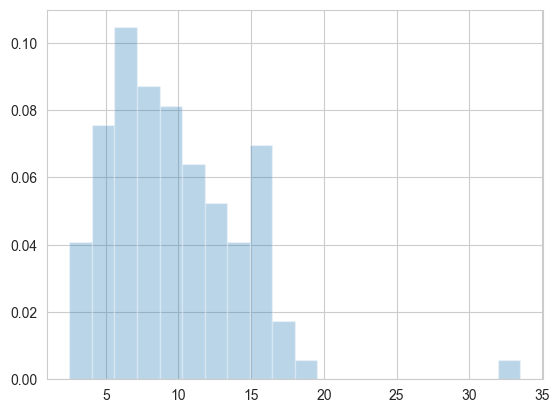

In [7]:
#SOLUTION_START
import numpy as np
import matplotlib.pyplot as plt
inzamelingen_df = pd.read_csv("inzamelingenALL.csv",sep=";", decimal=",", na_values=0)

plt.hist(inzamelingen_df['Gewicht (kg)'], alpha=0.3, density=True, bins=20, label='GFT')
#SOLUTION_END

b.Gebruik de data uit inzamelingenALL.csv om onderstaande grafiek na te bouwen. De grafiek moet er precies hetzelfde uitzien zoals de afbeelding. Let op: de jaren 2020 en 2025 zijn niet meegenomen in de resultaten, omdat de data daarvan niet volledig was. Als je halve jaartallen ziet op de x-as gebruik dan de functie ``plt.xticks`` 4p\

C:\Users\overvelj\AppData\Local\Temp\ipykernel_35792\2558301415.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearcost_rest = inzamelingen_filtered[inzamelingen_df["Eural codes"]==200301].groupby(['Jaar']).aggregate({'kostprijs':'sum'})
C:\Users\overvelj\AppData\Local\Temp\ipykernel_35792\2558301415.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearcost_gft = inzamelingen_filtered[inzamelingen_df["Eural codes"]==200108].groupby(['Jaar']).aggregate({'kostprijs':'sum'})
C:\Users\overvelj\AppData\Local\Temp\ipykernel_35792\2558301415.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearcost_papier = inzamelingen_filtered[inzamelingen_df["Eural codes"]==150101].groupby(['Jaar']).aggregate({'kostprijs':'sum'})


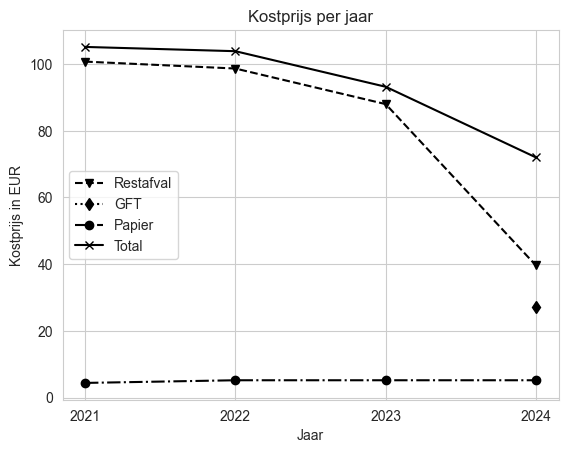

In [8]:
#SOLUTION_START
inzamelingen_filtered = inzamelingen_df[(inzamelingen_df["Jaar"]>2020) & (inzamelingen_df["Jaar"]<2025)]
yearcost_rest = inzamelingen_filtered[inzamelingen_df["Eural codes"]==200301].groupby(['Jaar']).aggregate({'kostprijs':'sum'})
yearcost_gft = inzamelingen_filtered[inzamelingen_df["Eural codes"]==200108].groupby(['Jaar']).aggregate({'kostprijs':'sum'})
yearcost_papier = inzamelingen_filtered[inzamelingen_df["Eural codes"]==150101].groupby(['Jaar']).aggregate({'kostprijs':'sum'})
yearcost_total = inzamelingen_filtered.groupby(['Jaar']).aggregate({'kostprijs':'sum'})

# yearcost_total= pd.DataFrame([105.13,103.85,93.185,72.0], columns=['kostprijs'], index=[2021,2022,2023,2024])
# yearcost_rest= pd.DataFrame([100.73,98.65,87.985,39.605], columns=['kostprijs'], index=[2021,2022,2023,2024])
# yearcost_gft= pd.DataFrame([27.195], columns=['kostprijs'], index=[2024])
# yearcost_papier= pd.DataFrame([4.4,5.2,5.2,5.2], columns=['kostprijs'], index=[2021,2022,2023,2024])

_=plt.plot(yearcost_rest, label='Restafval', marker='v', linestyle = '--', color='black')
_=plt.plot(yearcost_gft, label='GFT', marker='d', linestyle = ':', color='black')
_=plt.plot(yearcost_papier, label='Papier', marker='o', linestyle = '-.', color='black')
_=plt.plot(yearcost_total, label='Total', marker='x', linestyle='-', color='black')
_=plt.legend()
_=plt.title('Kostprijs per jaar')
_=plt.ylabel('Kostprijs in EUR')
_=plt.xlabel('Jaar')
_=plt.xticks(yearcost_rest.index)
#SOLUTION_END